In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.decomposition import PCA
df=pd.read_csv("C:/Users/Sri Advikam/Desktop/Amala/Amazon Music Clustering/single_genre_artists.csv")
df

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.1840,4,...,0.993,0.000016,0.3250,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.1800,10,...,0.989,0.000000,0.1280,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.2060,0,...,0.995,0.000000,0.4180,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.4670,9,...,0.991,0.000000,0.2190,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.2980,9,...,0.991,0.000000,0.3730,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,44r4zta6P9flkhKaVnbsvG,Freaks,70,174800,0,14Y3trk7LaslSFTk1G35rx,2019-02-25,0.674,0.5680,1,...,0.116,0.000000,0.1650,0.640,166.107,4,16057.0,['alt z'],Jordan Clarke,56
95833,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,5VGgFE9nPgMfEnYiPT5J2B,2020-02-25,0.528,0.6730,4,...,0.143,0.000000,0.0989,0.297,130.066,4,929.0,['chinese viral pop'],芝麻,36
95834,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,7vgGpuiXdNlCmc994PlMlz,2020-10-30,0.609,0.0172,8,...,0.996,0.973000,0.1080,0.890,68.619,4,23.0,['instrumental lullaby'],Laureen Conrad,52
95835,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,4MxqhahGRT4BPz1PilXGeu,2020-03-20,0.562,0.0331,1,...,0.996,0.961000,0.1110,0.386,63.696,3,91.0,['instrumental lullaby'],Gregory Oberle,55


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float64
 16  vale

In [7]:
df.shape

(95837, 23)

In [8]:
df.isna().sum()

id_songs              0
name_song             0
popularity_songs      0
duration_ms           0
explicit              0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
genres                0
name_artists          0
popularity_artists    0
dtype: int64

In [9]:
df.dtypes

id_songs               object
name_song              object
popularity_songs        int64
duration_ms             int64
explicit                int64
id_artists             object
release_date           object
danceability          float64
energy                float64
key                     int64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
time_signature          int64
followers             float64
genres                 object
name_artists           object
popularity_artists      int64
dtype: object

In [10]:
df.columns

Index(['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'name_artists', 'popularity_artists'],
      dtype='object')

In [11]:
df.describe()

,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artists
count,95837.000000,9.583700e+04,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,9.583700e+04,95837.000000
mean,26.066394,2.087320e+05,0.029644,0.586853,0.541083,5.196782,-10.157862,0.648069,0.168832,0.458989,0.082145,0.224916,0.574281,117.539870,3.851362,1.979919e+05,42.819329
std,16.254133,1.177526e+05,0.169604,0.155422,0.236304,3.534923,4.748798,0.477575,0.275417,0.330416,0.232440,0.185829,0.248126,30.190399,0.544406,7.807520e+05,20.897833
min,0.000000,6.373000e+03,0.000000,0.000000,0.000020,0.000000,-50.174000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,13.000000,1.573330e+05,0.000000,0.488000,0.365000,2.000000,-12.723000,0.000000,0.034100,0.133000,0.000000,0.100000,0.378000,94.829000,4.000000,2.563000e+03,28.000000
50%,26.000000,2.040000e+05,0.000000,0.605000,0.542000,5.000000,-9.397000,1.000000,0.046200,0.453000,0.000004,0.149000,0.589000,116.595000,4.000000,1.595600e+04,40.000000
75%,37.000000,2.502670e+05,0.000000,0.700000,0.727000,8.000000,-6.692000,1.000000,0.103000,0.759000,0.001300,0.302000,0.780000,135.975000,4.000000,8.495100e+04,56.000000
max,98.000000,4.800118e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.968000,0.996000,1.000000,0.997000,1.000000,239.906000,5.000000,2.802643e+07,95.000000


In [12]:
df.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [13]:
df['explicit'].unique()

array([0, 1])

In [14]:
df=df.drop_duplicates()

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.1840,4,...,0.993,0.000016,0.3250,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.1800,10,...,0.989,0.000000,0.1280,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.2060,0,...,0.995,0.000000,0.4180,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.4670,9,...,0.991,0.000000,0.2190,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.2980,9,...,0.991,0.000000,0.3730,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,44r4zta6P9flkhKaVnbsvG,Freaks,70,174800,0,14Y3trk7LaslSFTk1G35rx,2019-02-25,0.674,0.5680,1,...,0.116,0.000000,0.1650,0.640,166.107,4,16057.0,['alt z'],Jordan Clarke,56
95833,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,5VGgFE9nPgMfEnYiPT5J2B,2020-02-25,0.528,0.6730,4,...,0.143,0.000000,0.0989,0.297,130.066,4,929.0,['chinese viral pop'],芝麻,36
95834,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,7vgGpuiXdNlCmc994PlMlz,2020-10-30,0.609,0.0172,8,...,0.996,0.973000,0.1080,0.890,68.619,4,23.0,['instrumental lullaby'],Laureen Conrad,52
95835,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,4MxqhahGRT4BPz1PilXGeu,2020-03-20,0.562,0.0331,1,...,0.996,0.961000,0.1110,0.386,63.696,3,91.0,['instrumental lullaby'],Gregory Oberle,55


In [17]:
df['genres'].value_counts()

genres
['hoerspiel']                        8027
['kleine hoerspiel']                 2081
[]                                   1876
['classic israeli pop']              1180
['vintage taiwan pop']               1097
                                     ... 
['italian mezzo-soprano']               1
['deep discofox']                       1
['pinoy praise']                        1
['lithuanian metal']                    1
['chinese classical performance']       1
Name: count, Length: 3153, dtype: int64

In [18]:
df=df.drop(columns=['id_songs','name_song','name_artists','id_artists','genres'])

In [19]:
df.shape

(95837, 18)

In [20]:
df

,popularity_songs,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artists
0,0,161427,0,1922,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.654,133.088,3,5078.0,22
1,0,223440,0,1922,0.427,0.1800,10,-15.375,1,0.0670,0.989,0.000000,0.1280,0.431,78.459,3,5078.0,22
2,0,208267,0,1922,0.511,0.2060,0,-15.514,1,0.0592,0.995,0.000000,0.4180,0.481,70.443,4,5078.0,22
3,0,161933,0,1924,0.676,0.4670,9,-12.393,0,0.1650,0.991,0.000000,0.2190,0.726,129.775,4,5078.0,22
4,0,167973,0,1924,0.650,0.2980,9,-13.806,1,0.1380,0.991,0.000000,0.3730,0.844,75.950,4,5078.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,70,174800,0,2019-02-25,0.674,0.5680,1,-6.356,1,0.0408,0.116,0.000000,0.1650,0.640,166.107,4,16057.0,56
95833,50,265846,0,2020-02-25,0.528,0.6730,4,-3.639,1,0.0314,0.143,0.000000,0.0989,0.297,130.066,4,929.0,36
95834,67,82500,0,2020-10-30,0.609,0.0172,8,-28.573,1,0.1180,0.996,0.973000,0.1080,0.890,68.619,4,23.0,52
95835,66,185250,0,2020-03-20,0.562,0.0331,1,-25.551,1,0.1030,0.996,0.961000,0.1110,0.386,63.696,3,91.0,55


In [21]:
df['mode'].value_counts()

mode
1    62109
0    33728
Name: count, dtype: int64

In [22]:
df['key'].value_counts()

key
0     12357
7     11967
2     10906
9     10421
5      8896
4      7648
1      7314
11     6510
10     6163
8      5392
6      5041
3      3222
Name: count, dtype: int64

In [23]:
# categorical value will be create noise. so we drop this columns.
df=df.drop(columns=['key','mode','release_date'])

In [24]:
df.shape

(95837, 15)

In [3]:
df.columns

Index(['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'name_artists', 'popularity_artists'],
      dtype='object')

In [4]:
numeric_features = ['popularity_songs', 'duration_ms', 'explicit', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers',
       'popularity_artists']

X=df[numeric_features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=numeric_features)
print(X_scaled.head())


   popularity_songs  duration_ms  explicit  danceability    energy  loudness  \
0         -1.603686    -0.401735 -0.174785     -0.153476 -1.511128 -0.757909   
1         -1.603686     0.124906 -0.174785     -1.028518 -1.528056 -1.098629   
2         -1.603686    -0.003949 -0.174785     -0.488051 -1.418027 -1.127899   
3         -1.603686    -0.397437 -0.174785      0.573581 -0.313510 -0.470677   
4         -1.603686    -0.346143 -0.174785      0.406294 -1.028695 -0.768227   

   speechiness  acousticness  instrumentalness  liveness   valence     tempo  \
0    -0.427109      1.616187         -0.353338  0.538584  0.321287  0.515005   
1    -0.369741      1.604081         -0.353405 -0.521537 -0.577455 -1.294487   
2    -0.398062      1.622240         -0.353405  1.039046 -0.375943 -1.560003   
3    -0.013914      1.610134         -0.353405 -0.031836  0.611464  0.405268   
4    -0.111948      1.610134         -0.353405  0.796887  1.087031 -1.377593   

   time_signature  followers  populari

In [5]:

inertia_values = []
K=range(2,9)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_) 
    print('K value = ', k, 'Inertia value = ', kmeans.inertia_)
    

K value =  2 Inertia value =  1246152.0927353357
K value =  3 Inertia value =  1091145.298406845
K value =  4 Inertia value =  993794.7519753923
K value =  5 Inertia value =  927750.2736999657
K value =  6 Inertia value =  876794.3577658208
K value =  7 Inertia value =  835332.7971672663
K value =  8 Inertia value =  799668.674179663


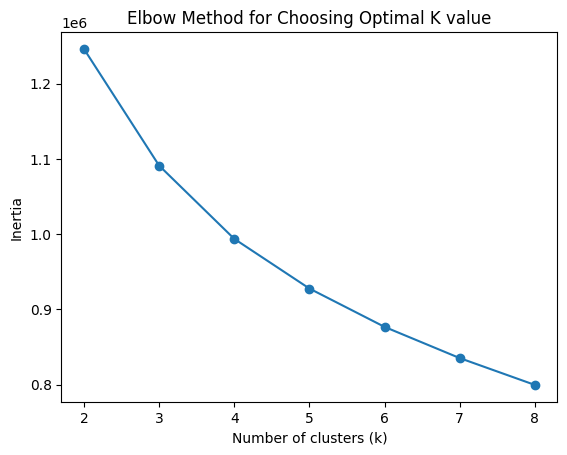

In [6]:
# Graph inertia vs. no. of clusters
plt.plot(K, inertia_values, marker='o')
plt.title("Elbow Method for Choosing Optimal K value")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [7]:
# Apply KMeans with optimal k
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10) 
labels_kmeans = kmeans.fit_predict(X_scaled)

df['cluster_kmeans'] = labels_kmeans

In [8]:
# Evaluation Metrics (KMeans)
sil_score = silhouette_score(X_scaled, labels_kmeans)
db_index = davies_bouldin_score(X_scaled, labels_kmeans)


print("Silhouette Score (KMeans):", sil_score)
print("Davies Bouldin Index(KMeans):", db_index)

Silhouette Score (KMeans): 0.19314521552486189
Davies Bouldin Index(KMeans): 1.6392499362245005


In [33]:
# Cluster Profiling (KMeans)
cluster_profile = df.groupby('cluster_kmeans')[numeric_features].mean()
print(cluster_profile)


                popularity_songs    duration_ms  explicit  danceability  \
cluster_kmeans                                                            
0                      15.865049  230860.742681  0.000000      0.483692   
1                      19.053367  221016.086042  0.000000      0.511506   
2                      29.530734   89530.565594  0.000000      0.661784   
3                      30.538905  228589.660720  0.000000      0.627810   
4                      41.277701  211607.537853  0.977632      0.686893   

                  energy   loudness  speechiness  acousticness  \
cluster_kmeans                                                   
0               0.413313 -13.966709     0.060393      0.652782   
1               0.339002 -12.368171     0.073677      0.716155   
2               0.478181 -13.151038     0.839810      0.566267   
3               0.703764  -7.434046     0.068358      0.241203   
4               0.684621  -7.077630     0.197389      0.245191   

           

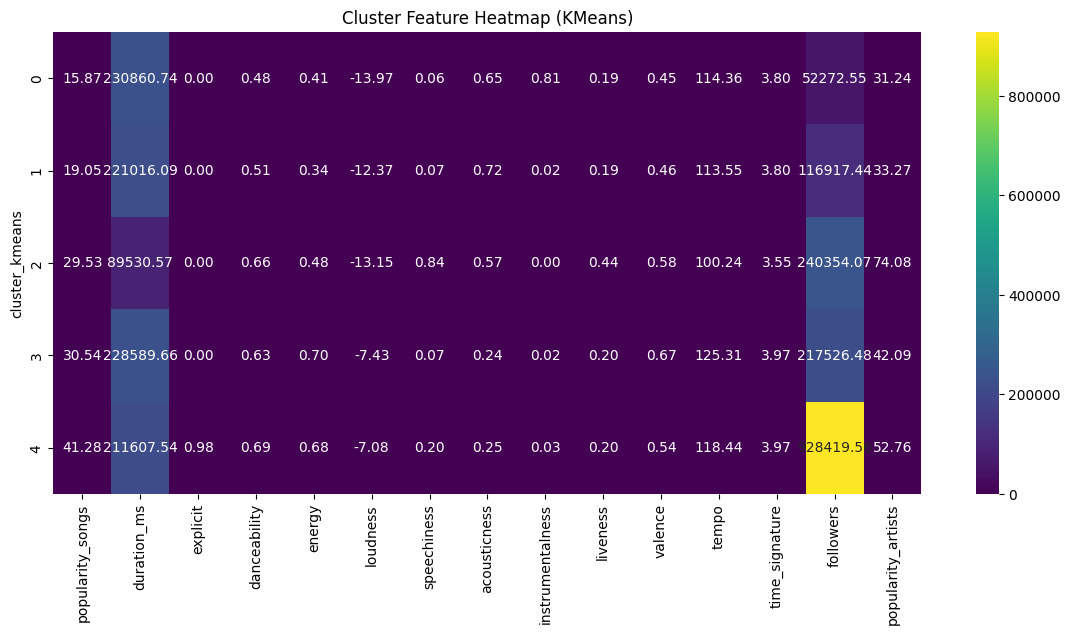

In [45]:
plt.figure(figsize=(14,6))
sns.heatmap(cluster_profile, annot=True, fmt=".2f", cmap="viridis" )
plt.title("Cluster Feature Heatmap (KMeans)")
plt.show()

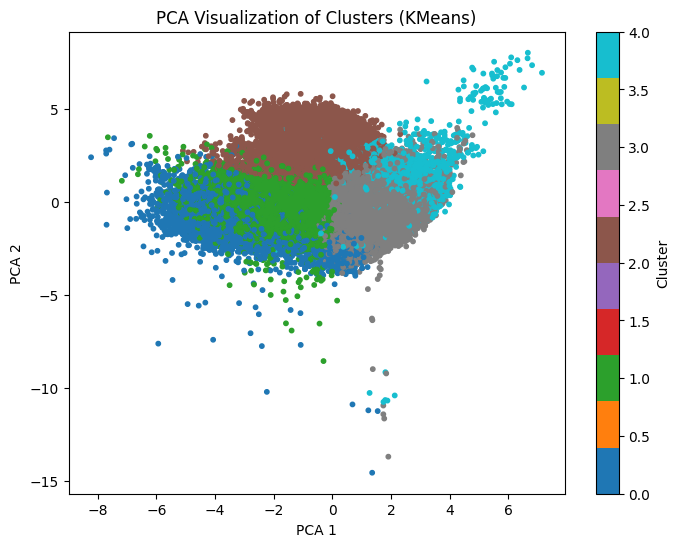

In [46]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap="tab10", s=10)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA Visualization of Clusters (KMeans)")
plt.colorbar(label="Cluster")
plt.show()
